# Car Price Prediction

## Importing Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plot
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [60]:
df=pd.read_csv("CarPrice - CarPrice.csv")

In [61]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Cleaning and Preparation

In [63]:
# Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [65]:
# Fixing invalid values
df.CompanyName = df.CompanyName.str.lower()

def change_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

change_name('maxda','mazda')
change_name('porcshce','porsche')
change_name('toyouta','toyota')
change_name('vokswagen','volkswagen')
change_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [66]:
# Check for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [67]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [69]:
df['fueltype'] = df['fueltype'].replace({'gas':1,'diesel':0})
df['aspiration'] = df['aspiration'].replace({'std':1,'turbo':0})
df['doornumber'] = df['doornumber'].replace({'two':1,'four':0})
df['carbody'] = df['carbody'].replace({'sedan':0,'wagon':1,'hatchback':2,'convertible':3,'hardtop':4})
df['drivewheel'] = df['drivewheel'].replace({'rwd':0,'fwd':1,'4wd':2})
df['enginelocation'] = df['enginelocation'].replace({'front':0,'rear':1})
df['enginetype'] = df['enginetype'].replace({'dohc':1,'ohcv':0,'ohc':2,'l':3,'rotor':4,'dohcv':5,'ohcf':6})
df['cylindernumber']=df['cylindernumber'].replace({'three':0,'four':1,'five':2,'six':3,'eight':4,'twelve':5,'two':6})
df['fuelsystem']=df['fuelsystem'].replace({'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spfi':4,'idi':5,'spdi':6,'4bbl':7})
df['CompanyName']=df['CompanyName'].replace({'alfa-romero':0,'audi':1,'bmw':2,'chevrolet':3,'dodge':4,'honda':5,'isuzu':6,'mazda':7,'buick':8,'mercury':9,'mitsubishi':10,'nissan':11,'peugeot':12,'plymouth':13,'porsche':14,'renault':15,'saab':16,'subaru':17,'toyota':18,'volkswagen':19,'volvo':20,'jaguar':21})


## Data Visualization

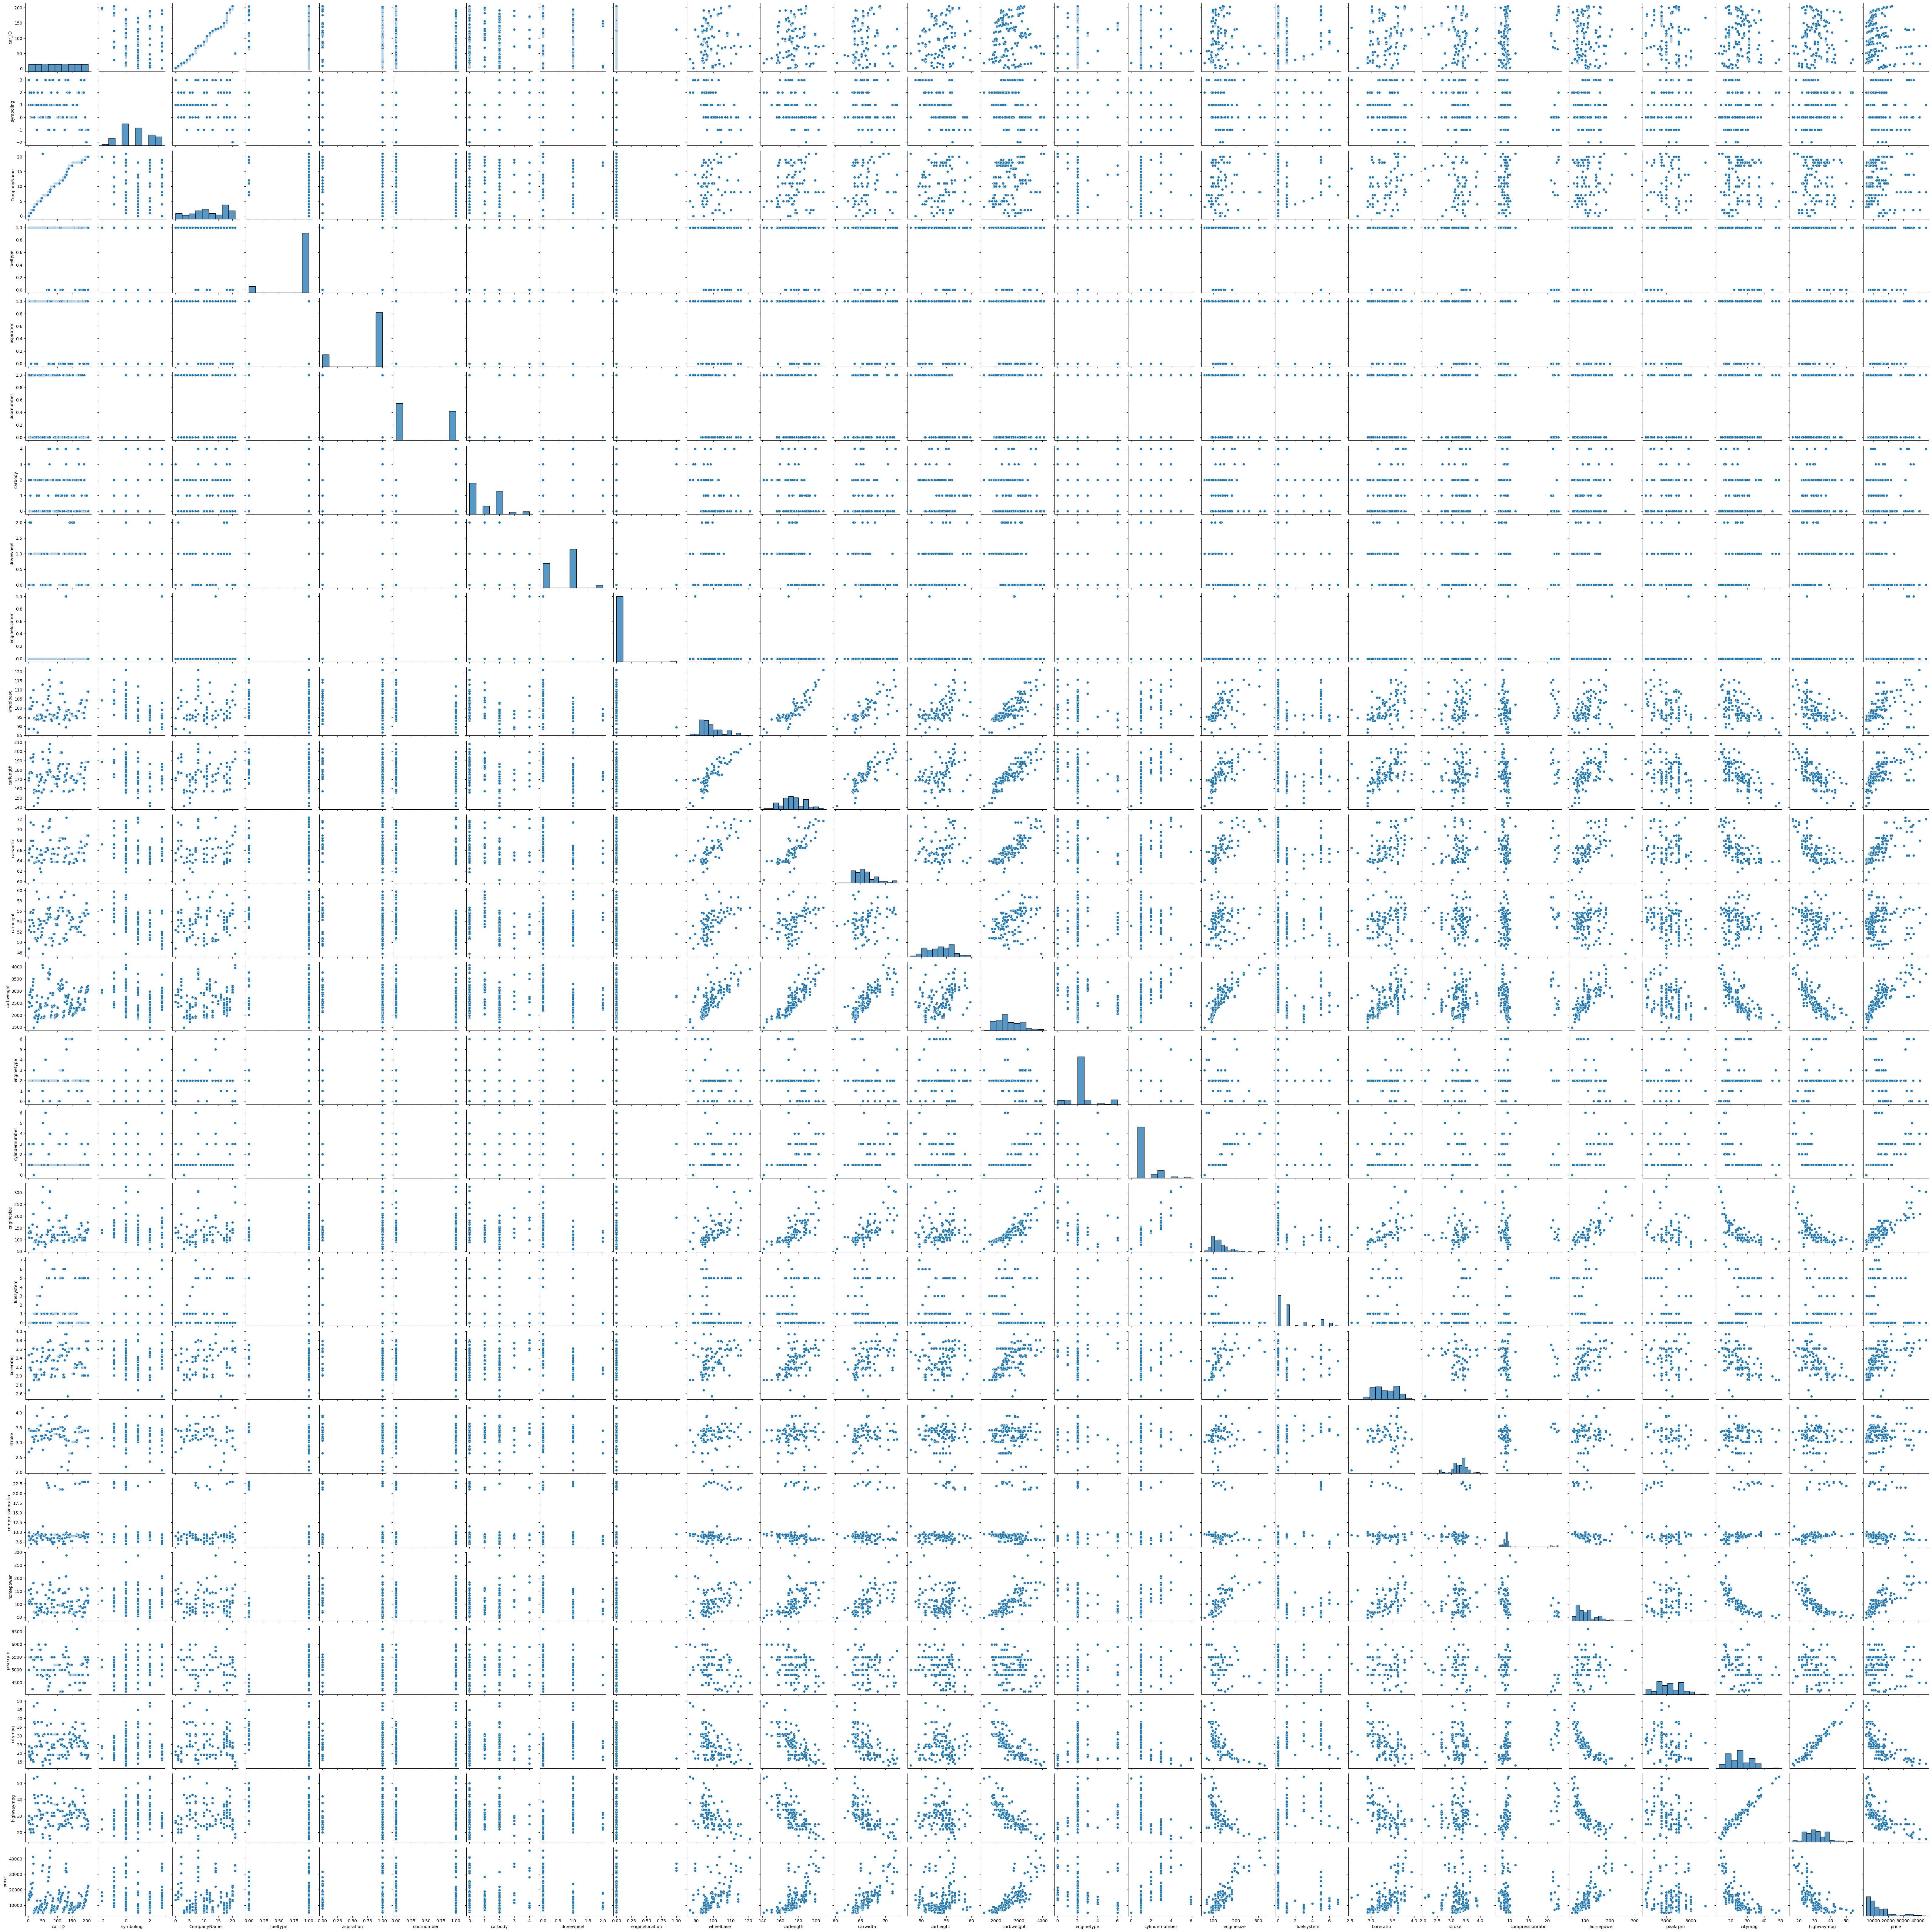

In [70]:
sns.pairplot(df)
plot.show()

## Training the model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [80]:
reg.fit(df[['car_ID','symboling','CompanyName','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg']],df.price)

LinearRegression()

## Predicting

In [82]:
reg.predict([[9,1,1,1,0,0,0,1,0,105.8,192.7,71.4,55.9,3086,2,2,131,0,3.13,3.4,8.3,140,5500,17,20]])

c:\Users\Richa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22159.65570646])

In [75]:
reg.coef_

array([-6.11906271e+00,  1.19002334e+02, -1.07648724e+02, -4.13929832e+03,
       -2.34643123e+03,  1.50824048e+02, -1.24137741e+02, -1.36215734e+03,
        1.03881288e+04,  3.07956579e+01, -8.63914805e+00,  6.04516909e+02,
        2.44986217e+02,  2.70405734e+00,  3.97412840e+02,  1.18941584e+03,
        1.11290080e+02, -3.61880176e+02, -9.42282635e+02, -1.97426562e+03,
       -2.17026182e+02, -9.73481421e+00,  1.91085473e+00, -1.43799765e+02,
        2.35091912e+02])

In [76]:
reg.intercept_

-56784.10722981914

## Accurcy Score

In [77]:
x=df[['car_ID', 'symboling','CompanyName' ,'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg']]
y=df.price

In [78]:
reg.score(x,y)*100

90.12449505354594